**bold text**# Proyek Analisis Data: [Bike Sharing Dataset](https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view)
- Nama: Thariq Ramadhan Alchandra Yasrial
- Email: athariqramadhan@gmail.com
- Id Dicoding: thariq101

## Menentukan Pertanyaan Bisnis

### Q1 : Faktor-faktor apa yang berpotensi mempengaruhi volume peminjaman sepeda?

### Q2 : Apa perbedaan karakteristik antara pengguna kasual(casual) dan pengguna terdaftar(registered)?

## Menyiapkan semua library yang dibutuhkan



In [1]:
# Install library
!pip install gdown

In [2]:
# Import and setting libraries
import gdown
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

## Data Wrangling

### Gathering Data

In [3]:
# Download data from google drive
file_id = "1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ"
output_file = "Bike-sharing-dataset.zip"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file)

Downloading...
From: https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ
To: /content/Bike-sharing-dataset.zip
100%|██████████| 280k/280k [00:00<00:00, 36.2MB/s]


'Bike-sharing-dataset.zip'

In [4]:
# Unzip data
!unzip /content/Bike-sharing-dataset.zip -d /content/Bike-sharing-dataset

Archive:  /content/Bike-sharing-dataset.zip
  inflating: /content/Bike-sharing-dataset/Readme.txt  
  inflating: /content/Bike-sharing-dataset/day.csv  
  inflating: /content/Bike-sharing-dataset/hour.csv  


In [5]:
# Read and check data
day_df = pd.read_csv("/content/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
# Read and check data
hour_df = pd.read_csv("/content/Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasakan cells diatas, kedua data hanya berbeda pada bagian hr saja. Untuk informasi pada masing dari kolomnya informasinya terdapat pada file Readme.txt.

- instant: indeks catatan
- dteday: tanggal
- season: musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
- yr: tahun (0: 2011, 1: 2012)
- mnth: bulan (1 hingga 12)
- hr: jam (0 hingga 23)
- holiday: apakah hari tersebut libur atau tidak (diambil dari http://dchr.dc.gov/page/holiday-schedule)
- weekday: hari dalam seminggu
- workingday: jika hari bukan akhir pekan atau libur, nilainya 1; sebaliknya, nilainya 0.
- weathersit:
1: Cerah, Beberapa awan, Sebagian berawan, Sebagian berawan
2: Kabut + Berawan, Kabut + Awan retak, Kabut + Beberapa awan, Kabut
3: Salju ringan, Hujan ringan + Badai petir + Awan bertebaran, Hujan ringan + Awan bertebaran
4: Hujan deras + Potongan es + Badai petir + Kabut, Salju + Kabut
- temp: Temperatur terormalisasi dalam Celsius. Nilainya dibagi dengan 41 (maksimum)
- atemp: Suhu terasa terormalisasi dalam Celsius. Nilainya dibagi dengan 50 (maksimum)
- hum: Kelembaban terormalisasi. Nilainya dibagi dengan 100 (maksimum)
- windspeed: Kecepatan angin terormalisasi. Nilainya dibagi dengan 67 (maksimum)
- casual: jumlah pengguna kasual
- registered: jumlah pengguna terdaftar
- cnt: jumlah total sepeda yang dipinjam termasuk pengguna kasual dan terdaftar

In [9]:
# Check is day_df from hour_df
hour_df.groupby(['dteday']).sum()['cnt'].equals(day_df.set_index('dteday')['cnt'])

True

Dengan melihat membandingkan kolom cnt pada hour_df yang sudah di groupby dengan dteday, terbukti bahwa dataset day_df berasal dari hour_df. Oleh karena itu, untuk seterus dataset yang digunakan hanya hour_df.

In [10]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

### Cleaning Data

In [11]:
# Rename columns
hour_df.rename(columns={'instant':'id',
                        'dteday':'datetime',
                        'yr':'year',
                        'mnth':'month',
                        'hr':'hour',
                        'weathersit':'weather_condition',
                        'temp':'temperature',
                        'atemp':'feeling_temperature',
                        'hum':'humidity',
                        'cnt':'total_count'},inplace=True)

# Change colum type
hour_df['id']=pd.to_datetime(hour_df['id'])
hour_df['datetime']=pd.to_datetime(hour_df['datetime'])
hour_df['season']=hour_df['season'].astype('category')
hour_df['year']=hour_df['year'].astype('category')
hour_df['month']=hour_df['month'].astype('category')
hour_df['hour']=hour_df['hour'].astype('category')
hour_df['holiday']=hour_df['holiday'].astype('category')
hour_df['weekday']=hour_df['weekday'].astype('category')
hour_df['workingday']=hour_df['workingday'].astype('category')
hour_df['weather_condition']=hour_df['weather_condition'].astype('category')

# Change column value
season_mapping = {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_df['season'] = hour_df['season'].map(season_mapping)
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
hour_df['month'] = hour_df['month'].map(month_mapping)
holiday_mapping = {0: 'No', 1: 'Yes'}
hour_df['holiday'] = hour_df['holiday'].map(holiday_mapping)
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
hour_df['weekday'] = hour_df['weekday'].map(weekday_mapping)
workingday_mapping = {0: 'No', 1: 'Yes'}
hour_df['workingday'] = hour_df['workingday'].map(workingday_mapping)
weather_condition_mapping = {1: 'Clear', 2: 'Cloudy', 3:'Light Rain/Snow', 4:'Heavy Rain/Snowfall'}
hour_df['weather_condition'] = hour_df['weather_condition'].map(weather_condition_mapping)

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   17379 non-null  datetime64[ns]
 1   datetime             17379 non-null  datetime64[ns]
 2   season               17379 non-null  category      
 3   year                 17379 non-null  category      
 4   month                17379 non-null  category      
 5   hour                 17379 non-null  category      
 6   holiday              17379 non-null  category      
 7   weekday              17379 non-null  category      
 8   workingday           17379 non-null  category      
 9   weather_condition    17379 non-null  category      
 10  temperature          17379 non-null  float64       
 11  feeling_temperature  17379 non-null  float64       
 12  humidity             17379 non-null  float64       
 13  windspeed            17379 non-

Pada dataset dilakukan cleaning dengan cara mengubah nama kolom menjadi lebih jelas, mengganti tipe data kolom, dan mengubah value menjadi lebih jelas. Tidak terdapat null value pada dataset sehingga tidak perlu melakukan cleaning untuk nilai null.

In [12]:
hour_df.head()

,id,datetime,season,year,month,hour,holiday,weekday,workingday,weather_condition,temperature,feeling_temperature,humidity,windspeed,casual,registered,total_count
0,1970-01-01 00:00:00.000000001,2011-01-01,Springer,0,Jan,0,No,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,1970-01-01 00:00:00.000000002,2011-01-01,Springer,0,Jan,1,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,1970-01-01 00:00:00.000000003,2011-01-01,Springer,0,Jan,2,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,1970-01-01 00:00:00.000000004,2011-01-01,Springer,0,Jan,3,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,1970-01-01 00:00:00.000000005,2011-01-01,Springer,0,Jan,4,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
hour_df.duplicated().sum()

0

Tidak ada data yang duplikat.

In [14]:
hour_df.describe()

,temperature,feeling_temperature,humidity,windspeed,casual,registered,total_count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak terlihat ada nilai yang aneh pada data.

In [31]:
hour_df.to_csv('main_data.csv', index=False)

Simpan data yang sudah dicleaning.

### **Exploratory Data Analysis (EDA)**

### Explore Q1 : Apa perbedaan karakteristik antara pengguna kasual(casual) dan pengguna terdaftar(registered)?

In [16]:
gb_df = hour_df.groupby(by="season").agg({"total_count": "mean"})
gb_df

,total_count
season,
Springer,111.114569
Summer,208.344069
Fall,236.016237
Winter,198.868856


Pada table terlihat bahwa penggunaan rata-rata per musim memiliki terbanyak pada musim panas dan gugur.

In [17]:
gb_df = hour_df.groupby(by="month").agg({"total_count": "mean"})
gb_df

,total_count
month,
Jan,94.424773
Feb,112.865026
Mar,155.410726
Apr,187.260960
May,222.907258
Jun,240.515278
Jul,231.819892
Aug,238.097627
Sep,240.773138


Pada table terlihat bahwa penggunaan rata-rata per bulan memiliki puncak pada bulan May-Oktober.

In [18]:
gb_df = hour_df.groupby(by="holiday").agg({"total_count": "mean"})
gb_df

,total_count
holiday,
No,190.42858
Yes,156.87000


Pada table terlihat bahwa penggunaan rata-rata terbanyak pada saat tidak liburan.

In [19]:
gb_df = hour_df.groupby(by="weekday").agg({"total_count": "mean"})
gb_df

,total_count
weekday,
Sunday,177.468825
Monday,183.744655
Tuesday,191.238891
Wednesday,191.130505
Thursday,196.436665
Friday,196.135907
Saturday,190.209793


Pada table terlihat bahwa penggunaan rata-rata hampir sama.

In [20]:
gb_df = hour_df.groupby(by="hour").agg({"total_count": "mean"})
gb_df

,total_count
hour,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


Pada table terlihat bahwa penggunaan rata-rata per jam memiliki puncak di jam 7 dan jam 17.

In [21]:
gb_df = hour_df.groupby(by="weather_condition").agg({"total_count": "mean"})
gb_df

,total_count
weather_condition,
Clear,204.869272
Cloudy,175.165493
Light Rain/Snow,111.579281
Heavy Rain/Snowfall,74.333333


Pada table terlihat bahwa penggunaan rata-rata per kondisi cuaca terbanyak pada pada kondisi cerah, dah semakin berkurang ketika cuaca semakin memburuk.

In [22]:
corr = hour_df.corr(numeric_only=True)
corr

,temperature,feeling_temperature,humidity,windspeed,casual,registered,total_count
temperature,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
feeling_temperature,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
total_count,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


Untuk mengidetifikasi faktor numerik yang paling berpengaruh digunakan teknis analisis lanjutan yaitu correlation matrik. Pada matriks terlihat total peminjaman sangat berpengaruh dengan jenis penggunaan casual atau tidak. Sedangkan faktor-faktor lain seperti temperature, suhu terasa, kelempaban, kecepatan angin, tidak lebih berpengaruh.

### Explore Q2 :  Apa perbedaan karakteristik antara pengguna kasual(casual) dan pengguna terdaftar(registered)?





In [23]:
print('Total casual     : ', hour_df['casual'].sum())
print('Total registered : ', hour_df['registered' ].sum())

Total casual     :  620017
Total registered :  2672662


Dapat dilihat jumlah penggunan terbanyak ada pada pengguna terdaftar sebanyak lebih dari 4 kali lipat pengguna casual.

In [24]:
gb_df = hour_df.groupby(by="weekday").agg({
    "casual": "mean",
    "registered": "mean"
})
gb_df.transpose()

weekday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
casual,56.163469,28.553449,23.580514,23.159192,24.872521,31.458786,61.246815
registered,121.305356,155.191206,167.658377,167.971313,171.564144,164.677121,128.962978


Pada table pengguna per hari terlihat bahwa puncak peminjaman sepeda rata-rata, pengguna casual ada pada hari Minggu dan Sabtu, sementara pengguna teregistrasi ada pada Hari Senin-Jumat.

In [25]:
gb_df = hour_df.groupby(by="hour").agg({
    "casual": "mean",
    "registered": "mean"
})
gb_df.transpose()

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
casual,10.158402,6.504144,4.772028,2.715925,1.253945,1.411437,4.161379,11.055021,21.679505,30.891334,46.477304,59.540578,68.293956,72.308642,75.567901,74.905350,73.745205,74.273973,61.120879,48.770604,36.233516,28.255495,22.252747,15.199176
registered,43.739669,26.871547,18.097902,9.011478,5.098996,18.478382,71.882759,201.009629,337.331499,188.418157,127.191197,148.602476,185.021978,181.352538,165.381344,176.327846,238.238356,387.178082,364.390110,262.752747,189.796703,144.059066,109.082418,72.631868


Pada table pengguna per jam terlihat bahwa puncak peminjaman sepeda rata-rata, pengguna kasual memiliki puncak di jam 12 sampai 17. Sedangkan pengguna terdaftar memiliki puncak dijam 8 dan jam 17.

In [26]:
gb_df = hour_df.groupby(by="holiday").agg({
    "casual": "mean",
    "registered": "mean"
})
gb_df.transpose()

holiday,No,Yes
casual,35.408377,44.718
registered,155.020203,112.152


Pada table pengguna per saat liburan terlihat bahwa puncak peminjaman sepeda rata-rata, pengguna kasual kebanyakan meminjam pada hari libur. Sedangkan pengguna terdaftar meminjam kebanyakan pada hari kerja.

## Visualization & Explanatory Analysis

## Q1 : Faktor-faktor apa yang berpotensi mempengaruhi volume peminjaman sepeda?

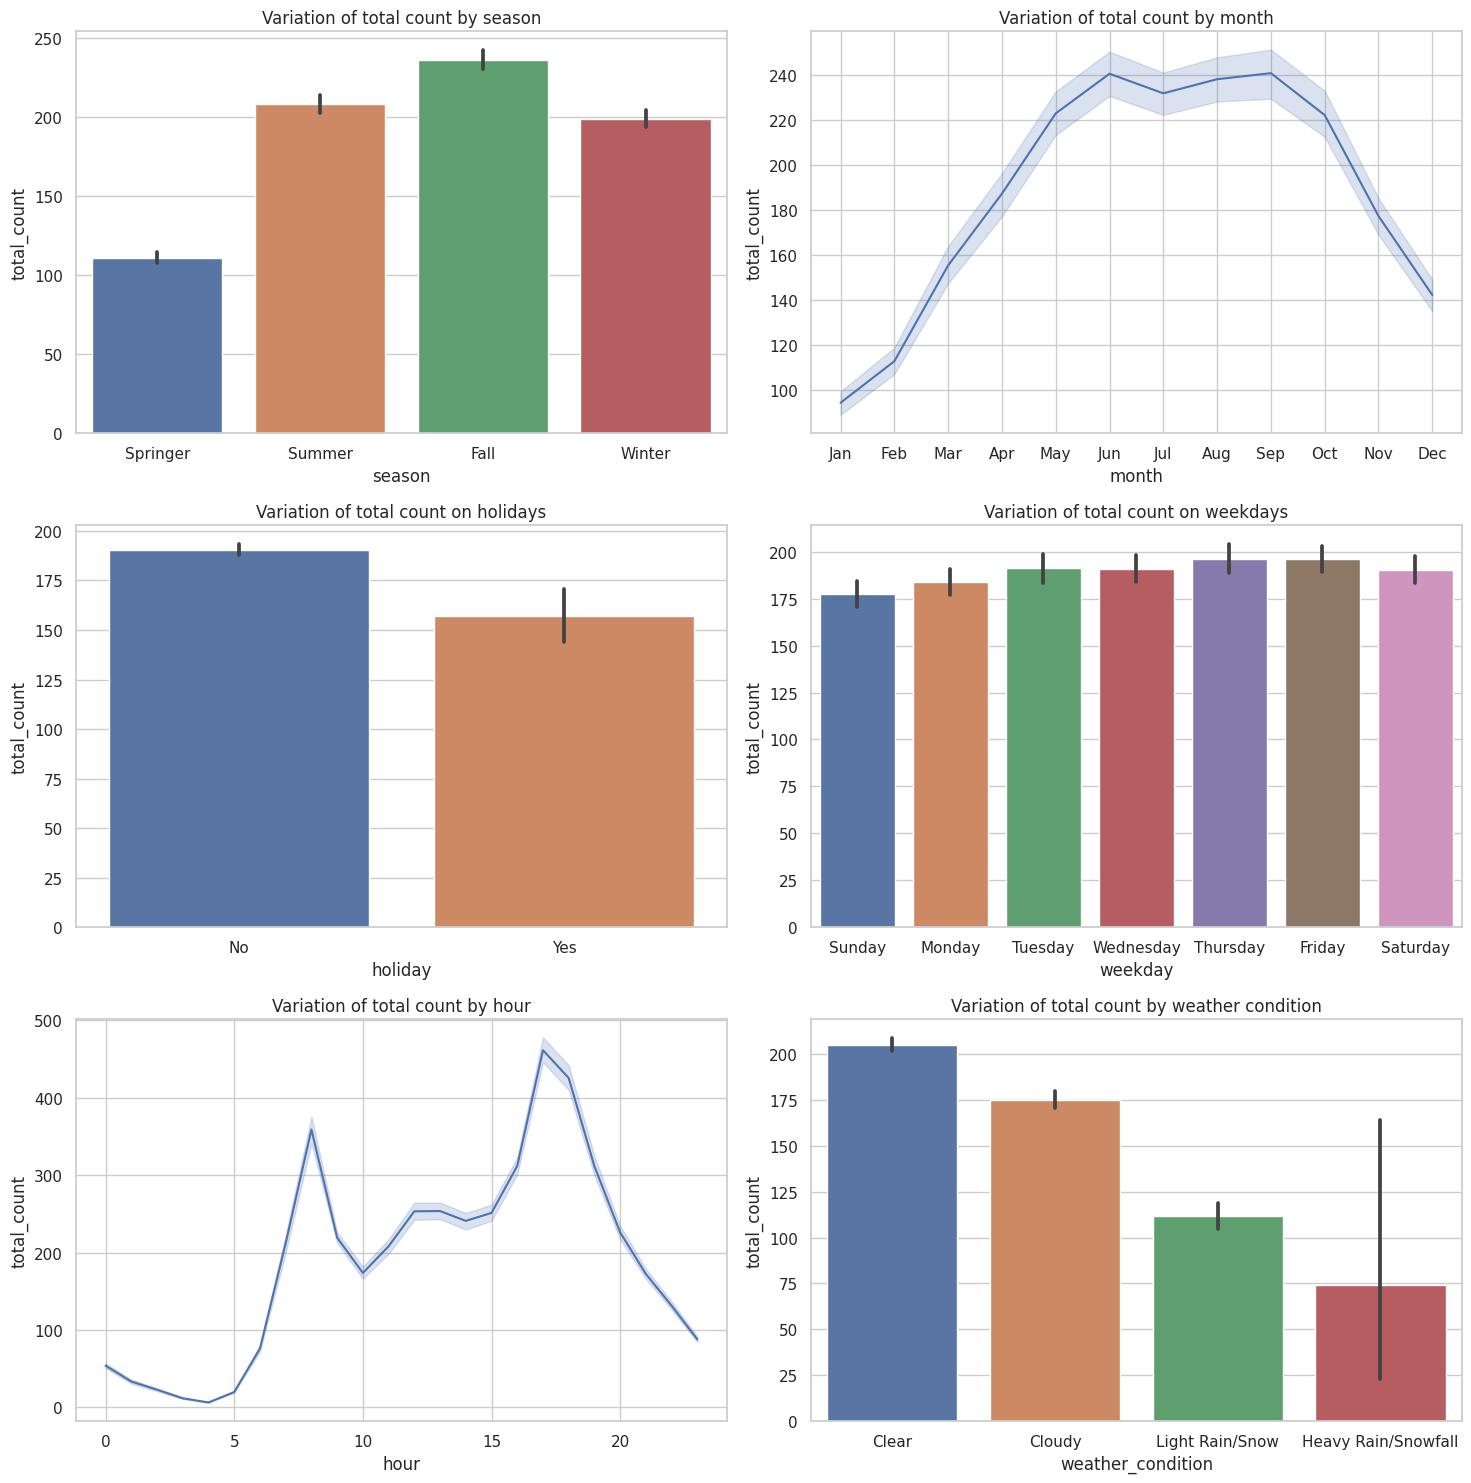

In [34]:
# Create a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Flatten the 2D array of subplots for easy indexing
axes = axes.flatten()

# Line plot for 'season'
sns.barplot(data=hour_df, x='season', y='total_count', ax=axes[0])
axes[0].set_title('Variation of total count by season')

# Line plot for 'month'
sns.lineplot(data=hour_df, x='month', y='total_count', ax=axes[1])
axes[1].set_title('Variation of total count by month')

# Line plot for 'holiday'
sns.barplot(data=hour_df, x='holiday', y='total_count', ax=axes[2])
axes[2].set_title('Variation of total count on holidays')

# Bar plot for 'weekday'
sns.barplot(data=hour_df, x='weekday', y='total_count', ax=axes[3])
axes[3].set_title('Variation of total count on weekdays')

# Line plot for 'hour'
sns.lineplot(data=hour_df, x='hour', y='total_count', ax=axes[4])
axes[4].set_title('Variation of total count by hour')


# Line plot for 'weather_condition'
sns.barplot(data=hour_df, x='weather_condition', y='total_count', ax=axes[5])
axes[5].set_title('Variation of total count by weather condition')

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


Text(0.5, 1.0, 'Correlation Matrix')

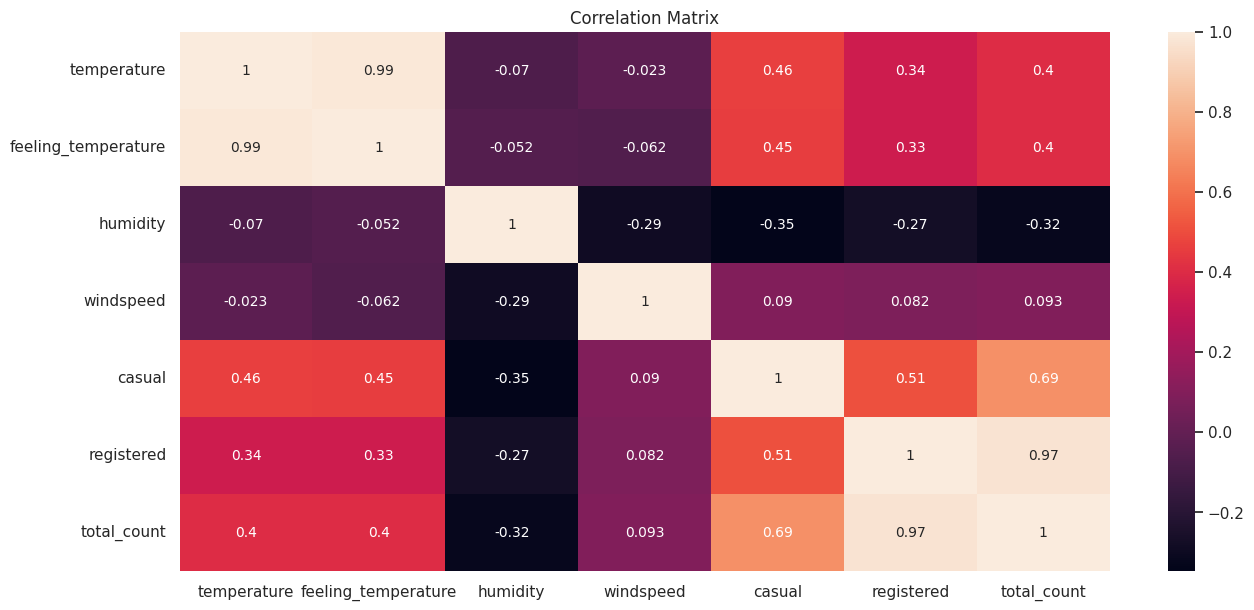

In [36]:
corr = hour_df.corr(numeric_only=True)

plt.figure(figsize=(15,7))
ax = sns.heatmap(corr, annot=True, annot_kws={'size':10})
ax.set_title('Correlation Matrix')

1. **Penggunaan rata-rata akan lebih banyak pada musim panas dan gugur:**
   - Peningkatan penggunaan pada musim panas dan gugur bisa terkait dengan cuaca yang lebih baik dan kondisi lingkungan yang lebih nyaman untuk bersepeda dibandingkan dengan musim dingin atau cuaca buruk.

2. **Penggunaan rata-rata memiliki puncak pada bulan Mei - Oktober:**
   - Peningkatan penggunaan pada bulan Mei - Oktober mungkin terkait dengan musim panas dan gugur, yang sering kali menjadi waktu yang lebih baik untuk bersepeda di banyak wilayah.

3. **Penggunaan rata-rata terbanyak ada pada saat bukan hari libur:**
   - Ini mungkin disebabkan oleh fakta bahwa pada hari-hari kerja atau saat bukan hari libur, lebih banyak orang cenderung menggunakan layanan peminjaman sepeda, mungkin untuk keperluan pekerjaan atau komuter harian.

4. **Penggunaan rata-rata hampir sama pada setiap harinya:**
   - Jika penggunaan rata-rata hampir sama pada setiap hari, ini bisa menunjukkan bahwa layanan peminjaman sepeda digunakan secara konsisten sepanjang minggu, dan tidak ada perbedaan signifikan antara hari kerja dan akhir pekan.

5. **Penggunaan rata-rata terbanyak ada pada jam 7 dan 17:**
   - Peningkatan penggunaan pada jam 7 dan 17 mungkin mencerminkan kebiasaan komuter yang menggunakan layanan ini saat pergi dan pulang kerja. Ini bisa menjadi indikasi popularitas layanan ini di kalangan pekerja.

6. **Penggunaan rata-rata akan berkurang seiring dengan memburuknya cuaca:**
   - Jika ada penurunan penggunaan saat cuaca buruk, ini mungkin disebabkan oleh kurangnya kenyamanan atau keamanan bersepeda saat kondisi cuaca yang tidak bersahabat.

7. **Nilai yang paling signifikan dalam jumlah peminjaman adalah tipe peminjaman sedangkan faktor-faktor lain tidak lebih berpengaruh dari faktor tersebut:**
   - Ini menunjukkan bahwa jenis peminjaman (misalnya, casual vs. terdaftar) memiliki dampak signifikan terhadap jumlah peminjaman. Analisis lebih lanjut dapat dilakukan untuk memahami faktor-faktor yang memengaruhi jenis peminjaman tersebut.


## Q2 : Apa perbedaan karakteristik antara pengguna kasual(casual) dan pengguna terdaftar(registered)?

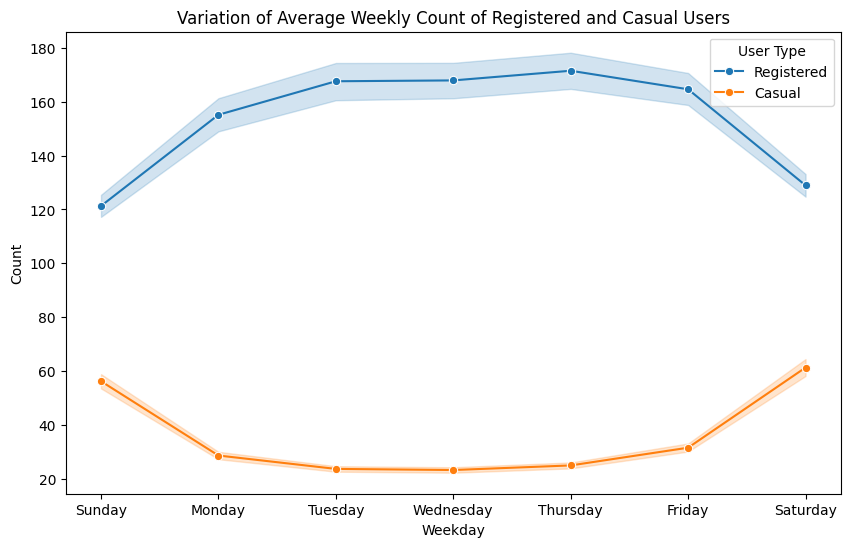

In [29]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='weekday', y='registered', data=hour_df, marker='o', label='Registered')
sns.lineplot(x='weekday', y='casual', data=hour_df, marker='o', label='Casual')

ax.set_title('Variation of Average Weekly Count of Registered and Casual Users')
ax.set_xlabel('Weekday')
ax.set_ylabel('Count')

ax.legend(title='User Type')

sns.set(style="whitegrid")

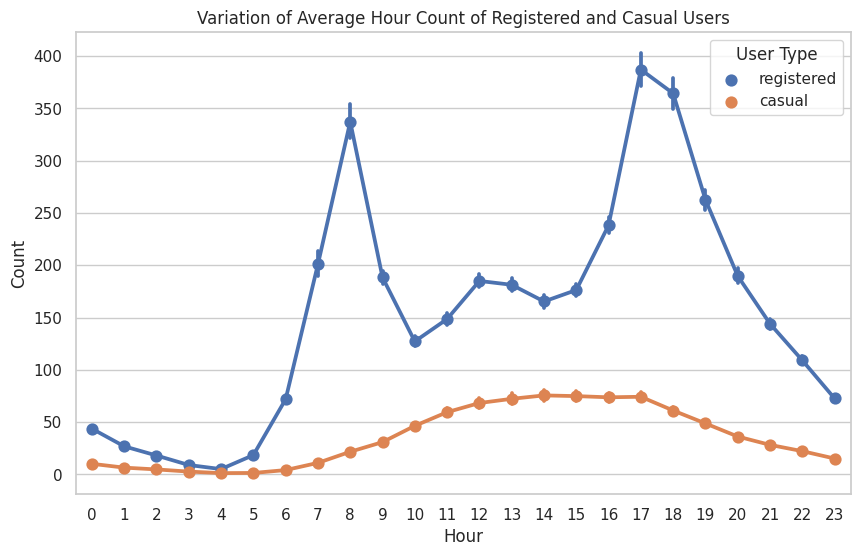

In [38]:
plt.figure(figsize=(10, 6))

ax = sns.pointplot(x='hour', y='registered', data=hour_df, color='#4c72b0', label='Registered')
sns.pointplot(x='hour', y='casual', data=hour_df, color='#dd8452', label='Casual')

ax.set_title('Variation of Average Hour Count of Registered and Casual Users')
ax.set_xlabel('Hour')
ax.set_ylabel('Count')

ax.legend(title='User Type')

sns.set(style="whitegrid")

plt.show()

1. **Pengguna terbanyak adalah pengguna terdaftar:**
   - Hal ini menunjukkan bahwa jumlah peminjaman sepeda didominasi oleh pengguna yang terdaftar. Analisis lebih lanjut dapat dilakukan untuk memahami profil dan kebiasaan peminjaman dari segmen pengguna terdaftar.

2. **Pengguna terdaftar rata-rata meminjam terbanyak pada hari kerja, sedangkan pengguna kasual rata-rata terbanyak meminjam pada hari libur:**
   - Perbedaan ini mungkin mencerminkan tujuan pengguna terdaftar yang lebih terkait dengan kegiatan sehari-hari atau komuteran pekerjaan, sementara pengguna kasual cenderung memanfaatkan layanan pada waktu luang mereka, terutama saat hari libur.

3. **Pengguna terdaftar rata-rata meminjam pada jam pergi kerja jam 7 dan pulang kerja jam 17, sedangkan pengguna kasual rata-rate terbanyak meminjam pada jam 12-17:**
   - Pola ini menunjukkan bahwa pengguna terdaftar cenderung memanfaatkan layanan lebih banyak selama jam-jam khas pergi dan pulang kerja. Sementara itu, pengguna kasual cenderung lebih aktif dalam meminjam sepeda pada jam-jam tengah hari, mungkin untuk keperluan rekreasi atau aktivitas santai.

Pemahaman tentang preferensi dan kebiasaan pengguna terdaftar dan kasual dapat memberikan wawasan berharga untuk pengelolaan inventaris, strategi pemasaran, dan pengembangan layanan yang lebih efektif.


## Conclusion

**Q1: Faktor-faktor yang Mempengaruhi Volume Peminjaman Sepeda**
- Pengaruh Musim:
    - Penggunaan rata-rata cenderung lebih tinggi pada musim panas dan gugur, mencerminkan preferensi pengguna untuk bersepeda dalam kondisi cuaca yang lebih baik.
    - Puncak penggunaan mencapai titik tertinggi antara bulan Mei hingga Oktober, menunjukkan popularitas yang lebih tinggi selama periode ini.

- Penggunaan Berdasarkan Hari dan Jam:
    - Penggunaan rata-rata terbanyak terjadi pada hari bukan libur, menunjukkan bahwa layanan paling diminati pada hari-hari kerja.
    - Penggunaan rata-rata hampir seragam setiap harinya, menandakan konsistensi penggunaan sepanjang minggu.
    - Puncak penggunaan terjadi pada jam 7 dan 17, mengindikasikan lonjakan aktivitas pada jam pergi dan pulang kerja.


- Pengaruh Cuaca:
    - Adanya penurunan penggunaan seiring memburuknya cuaca, menunjukkan sensitivitas pengguna terhadap kondisi cuaca yang kurang bersahabat.

- Pentingnya Tipe Peminjaman:
    - Nilai paling signifikan dalam jumlah peminjaman adalah jenis peminjaman (casual vs. registered), dengan faktor-faktor lain yang kurang berpengaruh.

**Q2: Perbedaan Karakteristik Pengguna Casual dan Pengguna Terdaftar**
- Profil Pengguna:
    - Pengguna terbanyak adalah pengguna terdaftar, menandakan dominasi jumlah peminjam oleh pengguna yang terdaftar.

- Kebiasaan Peminjaman:
    - Pengguna terdaftar cenderung meminjam lebih banyak pada hari kerja, sementara pengguna kasual lebih aktif pada hari libur.

- Polanya Peminjaman Harian:
    - Pengguna terdaftar memiliki kecenderungan meminjam pada jam pergi kerja (jam 7) dan pulang kerja (jam 17), sedangkan pengguna kasual cenderung meminjam pada jam 12-17, menunjukkan pola peminjaman yang berbeda pada waktu tertentu.

In [32]:
!pip freeze > requirements.txt